In [1]:
!pip3 install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#importing libraries
import pandas
from mlxtend.frequent_patterns import apriori #this function implements apriori algorithm for finding frequent items or itemsets in a transaction dataset
from mlxtend.frequent_patterns import association_rules #this function takes the frequent itemsets by Apriori on additional parameters like minimum confidence and minimum lift. it then generates rules based on these frequent itemsets and parameters

In [3]:
#load the data
store=pandas.read_csv('store.csv')
store.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# data cleaning
store['CustomerID'].fillna(0,inplace=True)
store.dropna(axis=0,subset=['Description'],inplace=True)
#change the column invoice to string using astype()
store['InvoiceNo']=store['InvoiceNo'].astype('str') #astype() is a function that converts data types eg intz to string

# store.isnull().sum()


/tmp/ipykernel_7324/2025712255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CustomerID'].fillna(0,inplace=True)


In [5]:
#Data Preprocessing
#create a Dataframe that has only france as the country
france=store[store['Country']=='France']
france



,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
29,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
30,30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...,...
540652,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
540653,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
540654,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
540655,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
# lets create baskets
baskets=france.groupby(['InvoiceNo','Description'])['Quantity'].sum()
baskets

InvoiceNo  Description                      
536370      SET 2 TEA TOWELS I LOVE LONDON      24
           ALARM CLOCK BAKELIKE GREEN           12
           ALARM CLOCK BAKELIKE PINK            24
           ALARM CLOCK BAKELIKE RED             24
           CHARLOTTE BAG DOLLY GIRL DESIGN      20
                                                ..
C580263    SET OF 6 HALLOWEEN GHOST T-LIGHTS   -36
           SKULL SHOULDER BAG                  -10
C581316    GLASS  SONGBIRD STORAGE JAR          -1
           RED RETROSPOT SUGAR JAM BOWL         -1
           REGENCY SUGAR BOWL GREEN             -1
Name: Quantity, Length: 8208, dtype: int64

In [7]:
# Using pivot_table(used to manipulate datasets quickly)
baskets= france.pivot_table(index='InvoiceNo',columns='Description',values='Quantity',fill_value=0) 
baskets.head(15)
#index=rows
#columns-columns
#values = what will be inside the cells

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# there are a lot of zeros in the data but we also want to make sure that any positive values are converted to 1 and anything less than 0(negative) is still going to be 0
# we will create a functiom that checks this
def encode(cell):
    if cell<=0:
       return 0
    if cell >0:
        return 1  
    
baskets_sets=baskets.applymap(encode) #applymap()accepts and returns a scalar value to every element/cell of the dataframe 
baskets_sets

/tmp/ipykernel_7324/853914929.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  baskets_sets=baskets.applymap(encode) #applymap()accepts and returns a scalar value to every element/cell of the dataframe


Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C579192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C579562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# apply Apriori Algorithm
# now that our data is structurerd we can generate frequent items that have a high support
frequent_items_sets=apriori(baskets_sets,min_support=0.1,use_colnames=True)
frequent_items_sets


/home/user/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.109375,(LUNCH BAG APPLE DESIGN)
1,0.133929,(LUNCH BAG RED RETROSPOT)
2,0.104911,(LUNCH BAG SPACEBOY DESIGN )
3,0.102679,(LUNCH BAG WOODLAND)
4,0.125000,(LUNCH BOX WITH CUTLERY RETROSPOT )
5,0.147321,(PLASTERS IN TIN CIRCUS PARADE )
6,0.120536,(PLASTERS IN TIN SPACEBOY)
7,0.149554,(PLASTERS IN TIN WOODLAND ANIMALS)
8,0.165179,(RABBIT NIGHT LIGHT)
9,0.120536,(RED RETROSPOT MINI CASES)


In [10]:
rules=association_rules(frequent_items_sets,metric='lift')
#we are generating association based on the above dataframe which has the mostly bought items,using lift it compares the items and gives the analysis of which items go hand in hand
#in our output we see that spotty paper plates are bought when spotty paper cups are bought and vice versa
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.111607,0.120536,0.107143,0.960000,7.964444,0.09369,21.986607,0.984296
1,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.120536,0.111607,0.107143,0.888889,7.964444,0.09369,7.995536,0.994289


In [11]:
#we want to filter using confidence and lift
rules[(rules['lift']>3)& (rules['confidence']>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.111607,0.120536,0.107143,0.960000,7.964444,0.09369,21.986607,0.984296
1,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.120536,0.111607,0.107143,0.888889,7.964444,0.09369,7.995536,0.994289


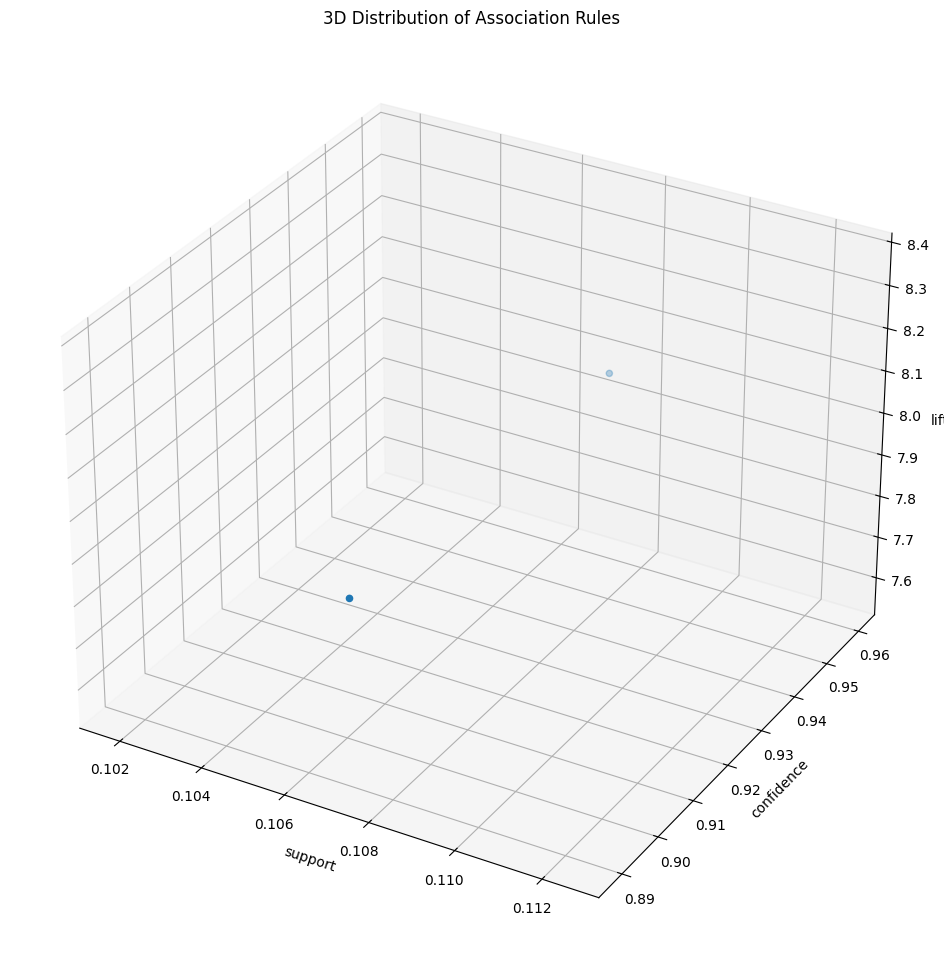

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
x=rules['support']
y=rules['confidence']
z=rules['lift']

figure=plt.figure(figsize=(12,12))
ax=figure.add_subplot(projection='3d')

ax.set_xlabel('support')
ax.set_ylabel('confidence')
ax.set_zlabel('lift')
ax.set_title('3D Distribution of Association Rules')


ax.scatter(x,y,z)
plt.show()